### Excercise #1

Download the HVFHV data for february 2021:

Repartition it to 24 partitions and save it to parquet.

What's the size of the folder with results (in MB)?

In [1]:
import pyspark

from pyspark.sql import SparkSession

ss = SparkSession.builder\
       .master("local[*]")\
       .appName("test")\
       .getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/04/19 10:52:40 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
ss

In [3]:
!ls

Untitled.ipynb             spark-warehouse
fhvhv_tripdata             titanic-apache.ipynb
fhvhv_tripdata_2021-02.csv


In [4]:
taxi_df = ss.read.csv('fhvhv_tripdata_2021-02.csv', header = True, inferSchema = True)

In [5]:
taxi_df.printSchema()

root
 |-- hvfhs_license_num: string (nullable = true)
 |-- dispatching_base_num: string (nullable = true)
 |-- pickup_datetime: string (nullable = true)
 |-- dropoff_datetime: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- SR_Flag: integer (nullable = true)



In [6]:
taxi_df.schema

StructType(List(StructField(hvfhs_license_num,StringType,true),StructField(dispatching_base_num,StringType,true),StructField(pickup_datetime,StringType,true),StructField(dropoff_datetime,StringType,true),StructField(PULocationID,IntegerType,true),StructField(DOLocationID,IntegerType,true),StructField(SR_Flag,IntegerType,true)))

In [7]:
from pyspark.sql import types

schema = types.StructType([
             types.StructField('hvfhs_license_num',types.StringType(),True),
             types.StructField('dispatching_base_num',types.StringType(),True),
             types.StructField('pickup_datetime',types.TimestampType(),True),
             types.StructField('dropoff_datetime',types.TimestampType(),True),
             types.StructField('PULocationID',types.IntegerType(),True),
             types.StructField('DOLocationID',types.IntegerType(),True),
             types.StructField('SR_Flag',types.StringType(),True)
                ])


In [8]:
taxi_df = ss.read.csv('fhvhv_tripdata_2021-02.csv', header = True, schema = schema)

In [9]:
taxi_df.printSchema()

root
 |-- hvfhs_license_num: string (nullable = true)
 |-- dispatching_base_num: string (nullable = true)
 |-- pickup_datetime: timestamp (nullable = true)
 |-- dropoff_datetime: timestamp (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- SR_Flag: string (nullable = true)



In [10]:
taxi_df = taxi_df.repartition(24)

In [11]:
taxi_df.write.parquet('fhvhv_tripdata/2021-02', mode = 'overwrite')

22/04/19 10:54:16 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 95.00% for 8 writers
22/04/19 10:54:16 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 84.44% for 9 writers
22/04/19 10:54:16 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 76.00% for 10 writers
22/04/19 10:54:16 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 69.09% for 11 writers
22/04/19 10:54:16 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 63.33% for 12 writers
22/04/19 10:54:19 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 69.09% for 11 writers
22/04/19 10:54:19 WARN MemoryManager: Total allocation exceeds 95.

In [12]:
!ls -lh 'fhvhv_tripdata/2021-02'

total 445440
-rw-r--r--  1 goceovoono  staff     0B Apr 19 10:54 _SUCCESS
-rw-r--r--  1 goceovoono  staff   8.5M Apr 19 10:54 part-00000-b26ccb90-4377-49d3-8fb6-ea06273ed48b-c000.snappy.parquet
-rw-r--r--  1 goceovoono  staff   8.4M Apr 19 10:54 part-00001-b26ccb90-4377-49d3-8fb6-ea06273ed48b-c000.snappy.parquet
-rw-r--r--  1 goceovoono  staff   8.5M Apr 19 10:54 part-00002-b26ccb90-4377-49d3-8fb6-ea06273ed48b-c000.snappy.parquet
-rw-r--r--  1 goceovoono  staff   8.5M Apr 19 10:54 part-00003-b26ccb90-4377-49d3-8fb6-ea06273ed48b-c000.snappy.parquet
-rw-r--r--  1 goceovoono  staff   8.5M Apr 19 10:54 part-00004-b26ccb90-4377-49d3-8fb6-ea06273ed48b-c000.snappy.parquet
-rw-r--r--  1 goceovoono  staff   8.4M Apr 19 10:54 part-00005-b26ccb90-4377-49d3-8fb6-ea06273ed48b-c000.snappy.parquet
-rw-r--r--  1 goceovoono  staff   8.5M Apr 19 10:54 part-00006-b26ccb90-4377-49d3-8fb6-ea06273ed48b-c000.snappy.parquet
-rw-r--r--  1 goceovoono  staff   8.5M Apr 19 10:54 part-00007-b26ccb90-4377-49d3-8fb6

In [13]:
!ls -lh 'fhvhv_tripdata/2021-02' | wc -l

      26


In [413]:
#Without "total 445440" line
#and 
#semantic file "-rw-r--r--  1 goceovoono  staff   0B Apr 18 14:41 _SUCCESS" line
#we would obtain 24 partitions.

In [15]:
taxi_df.show(5)

+-----------------+--------------------+-------------------+-------------------+------------+------------+-------+
|hvfhs_license_num|dispatching_base_num|    pickup_datetime|   dropoff_datetime|PULocationID|DOLocationID|SR_Flag|
+-----------------+--------------------+-------------------+-------------------+------------+------------+-------+
|           HV0003|              B02765|2021-02-03 17:39:48|2021-02-03 17:52:42|          22|          14|   null|
|           HV0005|              B02510|2021-02-03 20:43:11|2021-02-03 20:51:17|         138|           7|   null|
|           HV0003|              B02395|2021-02-03 07:51:10|2021-02-03 08:00:48|         213|         242|   null|
|           HV0005|              B02510|2021-02-02 20:50:42|2021-02-02 20:55:07|          63|          63|   null|
|           HV0003|              B02869|2021-02-01 00:59:41|2021-02-01 01:14:00|          32|          94|   null|
+-----------------+--------------------+-------------------+-------------------+

In [16]:
taxi_df = ss.read.parquet('fhvhv_tripdata/2021-02')

In [17]:
taxi_df.show(5)

+-----------------+--------------------+-------------------+-------------------+------------+------------+-------+
|hvfhs_license_num|dispatching_base_num|    pickup_datetime|   dropoff_datetime|PULocationID|DOLocationID|SR_Flag|
+-----------------+--------------------+-------------------+-------------------+------------+------------+-------+
|           HV0003|              B02864|2021-02-04 02:19:32|2021-02-04 02:30:59|          20|         220|   null|
|           HV0003|              B02887|2021-02-02 14:23:12|2021-02-02 14:44:21|          61|          95|   null|
|           HV0005|              B02510|2021-02-01 01:32:24|2021-02-01 01:54:28|          41|         186|   null|
|           HV0005|              B02510|2021-02-03 13:17:38|2021-02-03 13:24:43|         198|         160|   null|
|           HV0005|              B02510|2021-02-03 08:17:43|2021-02-03 08:43:33|         140|          68|   null|
+-----------------+--------------------+-------------------+-------------------+

In [18]:
taxi_df.repartition(24).rdd.getNumPartitions()

24

In [19]:
from pyspark.sql import functions as F #Following the convention to distinguish between Python and Spark functions

In [20]:
taxi_df = taxi_df \
         .withColumn('pickup_datetime', F.to_date(taxi_df.pickup_datetime)) \
         .withColumn('dropoff_datetime', F.to_date(taxi_df.dropoff_datetime))

# Excercise 2

How many taxi trips were there on February 15?

Consider only trips that started on February 15.

In [22]:
taxi_df.createOrReplaceTempView("taxi_df_view")

In [23]:
SQL_QUERY =  """
                SELECT COUNT(*) AS count_of_trips
                FROM taxi_df_view
                WHERE pickup_datetime = '2021-02-15'
             """

In [24]:
ss.sql(SQL_QUERY).show()

+--------------+
|count_of_trips|
+--------------+
|        367170|
+--------------+



# Excercise 3
Now calculate the duration for each trip.

Trip starting on which day was the longest?

In [25]:
taxi_df = ss.read.parquet('fhvhv_tripdata/2021-02') 

In [40]:
taxi_df = taxi_df \
          .withColumn('trip_duration', F.unix_timestamp(taxi_df.dropoff_datetime) -  F.unix_timestamp(taxi_df.pickup_datetime))
taxi_df.show(1)

+-----------------+--------------------+-------------------+-------------------+------------+------------+-------+-------------+
|hvfhs_license_num|dispatching_base_num|    pickup_datetime|   dropoff_datetime|PULocationID|DOLocationID|SR_Flag|trip_duration|
+-----------------+--------------------+-------------------+-------------------+------------+------------+-------+-------------+
|           HV0003|              B02864|2021-02-04 02:19:32|2021-02-04 02:30:59|          20|         220|   null|          687|
+-----------------+--------------------+-------------------+-------------------+------------+------------+-------+-------------+
only showing top 1 row



In [47]:
taxi_df \
        .withColumnRenamed('trip_duration', 'trip_duration (seconds)') \
        .orderBy('trip_duration', ascending = False) \
        .show(1)

+-----------------+--------------------+-------------------+-------------------+------------+------------+-------+-----------------------+
|hvfhs_license_num|dispatching_base_num|    pickup_datetime|   dropoff_datetime|PULocationID|DOLocationID|SR_Flag|trip_duration (seconds)|
+-----------------+--------------------+-------------------+-------------------+------------+------------+-------+-----------------------+
|           HV0005|              B02510|2021-02-11 13:40:44|2021-02-12 10:39:44|         247|          41|   null|                  75540|
+-----------------+--------------------+-------------------+-------------------+------------+------------+-------+-----------------------+
only showing top 1 row



In [151]:
print(f"Trip that started 2021-02-11 on 13:40:44 was the longest one and elapsed around ~{int(75540/60/60)}h.")

Trip that started 2021-02-11 on 13:40:44 was the longest one and elapsed around ~20h.


# Exercise 4
Now find the most frequently occurring dispatching_base_num in this dataset.

In [59]:
taxi_df.createOrReplaceTempView("taxi_df_view")

In [70]:
SQL_QUERY = """
                SELECT dispatching_base_num, COUNT(1) AS frequency
                FROM taxi_df_view
                GROUP BY dispatching_base_num
                ORDER BY frequency DESC
                LIMIT 1
            """

In [72]:
ss.sql(SQL_QUERY).show(5)

+--------------------+---------+
|dispatching_base_num|frequency|
+--------------------+---------+
|              B02510|  3233664|
+--------------------+---------+



# Excercise 5
Find the most common pickup-dropoff pair.

For example:

"Jamaica Bay / Clinton East"

Enter two zone names separated by a slash

If any of the zone names are unknown (missing), use "Unknown". For example, "Unknown / Clinton East".

In [153]:
# Initial idea without 'fancy formating'

In [74]:
!ls

Untitled.ipynb             spark-warehouse
fhvhv_tripdata             titanic-apache.ipynb
fhvhv_tripdata_2021-02.csv


In [75]:
!wget https://s3.amazonaws.com/nyc-tlc/misc/taxi+_zone_lookup.csv

--2022-04-19 12:19:13--  https://s3.amazonaws.com/nyc-tlc/misc/taxi+_zone_lookup.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.138.32
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.138.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12322 (12K) [application/octet-stream]
Saving to: ‘taxi+_zone_lookup.csv’

taxi+_zone_lookup.c 100%[===================>]  12.03K  --.-KB/s    in 0.002s  

2022-04-19 12:19:14 (5.33 MB/s) - ‘taxi+_zone_lookup.csv’ saved [12322/12322]



In [76]:
zone_lookup = ss.read.csv('taxi+_zone_lookup.csv', header = True, inferSchema = True)

In [77]:
zone_lookup.printSchema()

root
 |-- LocationID: integer (nullable = true)
 |-- Borough: string (nullable = true)
 |-- Zone: string (nullable = true)
 |-- service_zone: string (nullable = true)



In [78]:
zone_lookup.show(5)

+----------+-------------+--------------------+------------+
|LocationID|      Borough|                Zone|service_zone|
+----------+-------------+--------------------+------------+
|         1|          EWR|      Newark Airport|         EWR|
|         2|       Queens|         Jamaica Bay|   Boro Zone|
|         3|        Bronx|Allerton/Pelham G...|   Boro Zone|
|         4|    Manhattan|       Alphabet City| Yellow Zone|
|         5|Staten Island|       Arden Heights|   Boro Zone|
+----------+-------------+--------------------+------------+
only showing top 5 rows



In [79]:
!mkdir zone_lookup

In [81]:
zone_lookup.write.parquet('zone_lookup', mode = 'overwrite')

In [83]:
!ls -lh zone_lookup

total 16
-rw-r--r--  1 goceovoono  staff     0B Apr 19 12:24 _SUCCESS
-rw-r--r--  1 goceovoono  staff   5.8K Apr 19 12:24 part-00000-4c7664f9-c093-4fa4-a409-5ac1a3c40725-c000.snappy.parquet


In [84]:
zone_lookup = ss.read.parquet('zone_lookup')

In [85]:
zone_lookup.show(5)

+----------+-------------+--------------------+------------+
|LocationID|      Borough|                Zone|service_zone|
+----------+-------------+--------------------+------------+
|         1|          EWR|      Newark Airport|         EWR|
|         2|       Queens|         Jamaica Bay|   Boro Zone|
|         3|        Bronx|Allerton/Pelham G...|   Boro Zone|
|         4|    Manhattan|       Alphabet City| Yellow Zone|
|         5|Staten Island|       Arden Heights|   Boro Zone|
+----------+-------------+--------------------+------------+
only showing top 5 rows



In [73]:
taxi_df.show(5)

+-----------------+--------------------+-------------------+-------------------+------------+------------+-------+-------------+
|hvfhs_license_num|dispatching_base_num|    pickup_datetime|   dropoff_datetime|PULocationID|DOLocationID|SR_Flag|trip_duration|
+-----------------+--------------------+-------------------+-------------------+------------+------------+-------+-------------+
|           HV0003|              B02864|2021-02-04 02:19:32|2021-02-04 02:30:59|          20|         220|   null|          687|
|           HV0003|              B02887|2021-02-02 14:23:12|2021-02-02 14:44:21|          61|          95|   null|         1269|
|           HV0005|              B02510|2021-02-01 01:32:24|2021-02-01 01:54:28|          41|         186|   null|         1324|
|           HV0005|              B02510|2021-02-03 13:17:38|2021-02-03 13:24:43|         198|         160|   null|          425|
|           HV0005|              B02510|2021-02-03 08:17:43|2021-02-03 08:43:33|         140|    

In [102]:
SQL_QUERY = """
                SELECT PULocationID, DOLocationID, COUNT(1) AS frequency
                FROM taxi_df_view
                GROUP BY 1,2
                ORDER BY frequency DESC
            """

In [105]:
ss.sql(SQL_QUERY).show(5)

+------------+------------+---------+
|PULocationID|DOLocationID|frequency|
+------------+------------+---------+
|          76|          76|    45041|
|          26|          26|    37329|
|          39|          39|    28026|
|          61|          61|    25976|
|          14|          14|    17934|
+------------+------------+---------+
only showing top 5 rows



In [147]:
zone_lookup.select('*').where(zone_lookup.LocationID == 76).show()

+----------+--------+-------------+------------+
|LocationID| Borough|         Zone|service_zone|
+----------+--------+-------------+------------+
|        76|Brooklyn|East New York|   Boro Zone|
+----------+--------+-------------+------------+



In [164]:
target_zone = zone_lookup.select('*').where(zone_lookup.LocationID == 76).collect()[0][2]

In [165]:
print(f'The most common pickup-dropoff pair is {target_zone}/{target_zone}.')

The most common pickup-dropoff pair is East New York/East New York.


In [ ]:
#Quick check if PULocationID == DOLocationID makes sense
#First we will convert trip_duration to minutes for easier interpretation.

In [133]:
from pyspark.types import IntegerType
taxi_df = taxi_df \
            .withColumn('trip_duration', (taxi_df.trip_duration/60).cast(IntegerType())) \
            .withColumnRenamed('trip_duration', 'trip_duration (minutes)') \
            .orderBy('trip_duration', ascending = False)

In [134]:
taxi_df.show(1)

+-----------------+--------------------+-------------------+-------------------+------------+------------+-------+-----------------------+
|hvfhs_license_num|dispatching_base_num|    pickup_datetime|   dropoff_datetime|PULocationID|DOLocationID|SR_Flag|trip_duration (minutes)|
+-----------------+--------------------+-------------------+-------------------+------------+------------+-------+-----------------------+
|           HV0005|              B02510|2021-02-11 13:40:44|2021-02-12 10:39:44|         247|          41|   null|                   1259|
+-----------------+--------------------+-------------------+-------------------+------------+------------+-------+-----------------------+
only showing top 1 row



In [135]:
taxi_df.createOrReplaceTempView("taxi_df_view")

In [ ]:
#Checking all the trips in the same zone

In [154]:
SQL_QUERY = """
                SELECT *
                FROM taxi_df_view
                WHERE PULocationID = DOLocationID
            """

In [137]:
ss.sql(SQL_QUERY).show()

+-----------------+--------------------+-------------------+-------------------+------------+------------+-------+-----------------------+
|hvfhs_license_num|dispatching_base_num|    pickup_datetime|   dropoff_datetime|PULocationID|DOLocationID|SR_Flag|trip_duration (minutes)|
+-----------------+--------------------+-------------------+-------------------+------------+------------+-------+-----------------------+
|           HV0005|              B02510|2021-02-21 19:59:13|2021-02-22 04:56:16|          10|          10|   null|                    537|
|           HV0005|              B02510|2021-02-02 09:42:30|2021-02-02 18:17:43|          85|          85|   null|                    515|
|           HV0005|              B02510|2021-02-12 06:16:42|2021-02-12 14:39:10|         205|         205|   null|                    502|
|           HV0005|              B02510|2021-02-03 10:05:21|2021-02-03 17:57:04|          85|          85|   null|                    471|
|           HV0003|        

I'm not kind of 'grab a taxi' guy, but I think some of this data might have sense:

1) A customer can 'churn' a taxi drive because many number of reasons (sudden phone call, not satisfied with the taxi-driever etc.).
   That would explain some shorter trip durations and I think some reasonable trip_duration threshold is worth discussing. 
2) There might be some problems considering taxi cars/drivers that capture data such as dropoff_datetime.
   That would explain some longer trip durations but further investigations should take place, and I'm safe to say that you can't deduce too much
   by just using this dataset.

In [ ]:
#Let's calculate the frequency of drives in the same zone per each taxi driver

In [168]:
SQL_QUERY = """
                SELECT hvfhs_license_num, COUNT(1) as frequency
                FROM taxi_df_view
                WHERE PULocationID = DOLocationID
                GROUP BY hvfhs_license_num
                ORDER BY frequency DESC
            """

In [169]:
ss.sql(SQL_QUERY).show()

+-----------------+---------+
|hvfhs_license_num|frequency|
+-----------------+---------+
|           HV0003|   648406|
|           HV0005|   245014|
|           HV0004|     2788|
+-----------------+---------+



Seems that out of all vehicles these 3 are the only ones in the dataset driving in the same zone.

Let's investigate those a little further by considering average duration of trips in minutes and plotting their distributions.

Be advised that this is only 'back of the enverlope' calculation since I've casted the trip_duration to integer values.

NOTE: Not to be confused with the 'most common' pickup-dropoff pair since this query incorporates ALL the "same zone" trips. 

In [201]:
taxi_df = taxi_df.withColumnRenamed('trip_duration (minutes)', 'trip_duration')
taxi_df.createOrReplaceTempView("taxi_df_view")

In [233]:
#Average trip duration in minutes

In [312]:
SQL_QUERY = """
                SELECT hvfhs_license_num, ROUND(AVG(trip_duration), 3) AS average_trip_duration
                FROM taxi_df_view
                WHERE PULocationID = DOLocationID
                GROUP BY hvfhs_license_num
                ORDER BY hvfhs_license_num
            """

In [313]:
ss.sql(SQL_QUERY).show()

+-----------------+---------------------+
|hvfhs_license_num|average_trip_duration|
+-----------------+---------------------+
|           HV0003|                7.828|
|           HV0004|                5.143|
|           HV0005|                8.671|
+-----------------+---------------------+



In [237]:
#Visualizing distribution of trip_durations

In [238]:
SQL_QUERY = """
                SELECT *
                FROM taxi_df_view
                WHERE PULocationID = DOLocationID
            """

In [292]:
same_zone = ss.sql(SQL_QUERY).select('hvfhs_license_num', 'trip_duration')

For a sake of showing the 'meat' of distribution we will exclude some data.

In [350]:
#Let's calculate how many trips have duration is >30 minutes
count_trip_duration_larger_than_30 = same_zone.where(same_zone.trip_duration > 30).count()

In [351]:
count_trip_duration_larger_than_30

21939

In [352]:
print(f'Percentage of data that will be excluded from the visualization {round((count_trip_duration_larger_than_30/same_zone.count())*100, 2)}%.')

Percentage of data that will be excluded from the visualization 2.45%.


In [355]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [346]:
pandas_df = same_zone.toPandas()

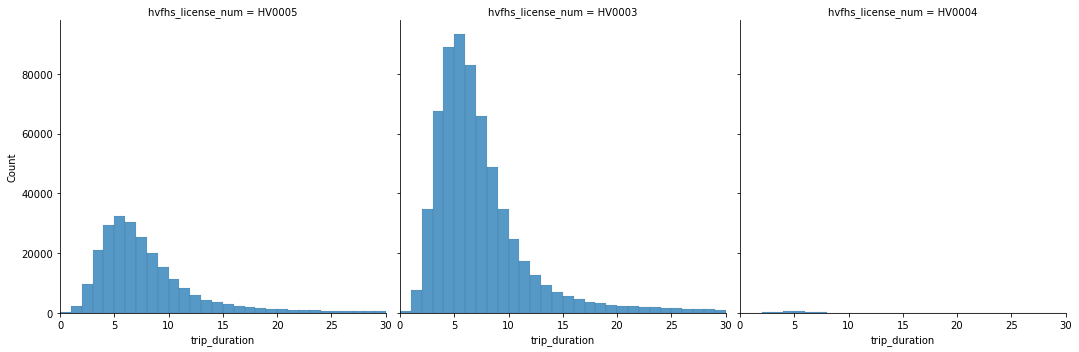

In [411]:
sns.displot(pandas_df, x="trip_duration", binwidth=1, col = 'hvfhs_license_num', common_norm = True)
plt.xlim(0,30);

In [409]:
SQL_QUERY = """
                SELECT hvfhs_license_num, ROUND(AVG(trip_duration), 3) AS average_trip_duration
                FROM taxi_df_view
                WHERE PULocationID = DOLocationID
                GROUP BY hvfhs_license_num
                ORDER BY hvfhs_license_num
            """

In [410]:
ss.sql(SQL_QUERY).show()

+-----------------+---------------------+
|hvfhs_license_num|average_trip_duration|
+-----------------+---------------------+
|           HV0003|                7.828|
|           HV0004|                5.143|
|           HV0005|                8.671|
+-----------------+---------------------+



# CONCLUSION

Distributions seem kind of positively skewed, and I'm guessing that if we got more data the same shape would be obtained for 'HV0004'. 

All of them have roughly the same average trip duration (especially HV0003 and HV0005) and all of them are 'gravitating' towards lower trip duration (skewed data). 

Based on the visualization, I'm guessing that most of the people who get to drive these taxi cabs would churn after ~10min of driving. 

Since these represent subset of dataset where pickup-dropoff pair is considered for the same zone, and we counted around 900k of such taxi trips FOR ONE MONTH I would be very concerned as someone who holds a taxi service.

Further investigations to support the claim are needed.